In [5]:
import requests
import pandas as pd
from PIL import Image
from io import BytesIO
from hdfs import InsecureClient

## Art Institute of Chicago API - Exploration

In [2]:
# Getting the full list of artworks from this url
url = 'https://api.artic.edu/api/v1/artworks'
r = requests.get(url)
r = r.json()

In [20]:
# Extracting data
df = pd.DataFrame()
for i in range(1,1001):
    r = requests.get(url = f'https://api.artic.edu/api/v1/artworks?page={i}&limit=100').json()
    r = pd.json_normalize(r, ['data'])
    df = df.append(r, ignore_index=True) # type: ignore

df.head(5)

""


In [56]:
# checkpoint
#df.to_csv(r'C:\Users\Manuel Elizaldi\Desktop\Learning-Testing\Artificial-Art\Resources\chicago_art.csv')
df = pd.read_csv(r'C:\Users\Manuel Elizaldi\Desktop\Learning-Testing\Artificial-Art\Resources\clean_chicago_art.csv')

df.head(5)

c:\Users\Manuel Elizaldi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,4,5,10,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,image_id,api_link,title,date_start,date_end,date_display,artist_display,place_of_origin,medium_display,is_on_view,artwork_type_title,artwork_type_id,artist_title,category_titles
0,208143,7f0c1692-cd8a-ca14-e70a-b8252f55c453,https://api.artic.edu/api/v1/artworks/208143,Library Ladder,1782.0,1782.0,1782,"William France (English, 1759–1838)\nLondon\nM...",England,Mahogany and brass,True,Furniture,6.0,William France,['Applied Arts of Europe']
1,117475,bf4f48ed-2bfd-5273-f743-86d6c66b19a3,https://api.artic.edu/api/v1/artworks/117475,Punch Bowl,1789.0,1789.0,c. 1789,"China, Jiaqing reign\nChinese, made for the Am...",China,Porcelain,True,Decorative Arts,8.0,Chinese export porcelain,"['Drinking and Dining', 'Arts of the Americas']"
2,146866,89812512-0a61-0bd5-02b8-a88c375cb8ad,https://api.artic.edu/api/v1/artworks/146866,Armchair,1867.0,1870.0,c. 1867-70,"Designed by Owen Jones\nEnglish, 1809–1874\nMa...",London,"Mahogany, purpleheart, ebony, harewood, holly,...",True,Furniture,6.0,Owen Carter Jones,['Applied Arts of Europe']
3,60561,454a922b-eeb9-183f-c930-d0fb7fbe09ef,https://api.artic.edu/api/v1/artworks/60561,Desk,1755.0,1770.0,c. 1760-65,"Probably Valentini Workshop (Italian, active c...",Milan,"Wood, walnut and pine, bronze mounts",False,Furniture,6.0,Valentini Workshop,['Applied Arts of Europe']
4,88348,cf70140e-9493-565e-b70d-d1a8183ccb90,https://api.artic.edu/api/v1/artworks/88348,Vestment (For a First-degree Taoist Priest),1793.0,1793.0,"Qing dynasty (1644–1911), 1793","Zheng Wuda? (Hui- chang, active c. 1793)\nHan-...",China,"Silk, warp-float faced 7:1 satin weave; embroi...",False,Costume and Accessories,12.0,Han-Chinese,['Textiles']


In [71]:
# Exploration of columns
pd.set_option('display.max_columns', None)
df.head(1)

# Getting the columns I want
#df = df[['id', 'image_id', 'api_link', 'title', 'artist_title', 'date_start', 'date_end', 'date_display', 'place_of_origin', 'medium_display','artwork_type_title', 'category_titles']]
df = df.dropna()

# Filtering artowork types
df = df.loc[df['artwork_type_title'].isin(['Painting'])]

# saving file
#df.to_csv(r'C:\Users\Manuel Elizaldi\Desktop\Learning-Testing\Artificial-Art\Resources\clean_chicago_art.csv', index=False)

In [98]:
# testing getting image files
# https://www.artic.edu/iiif/2/{identifier}/{region}/{size}/{rotation}/{quality}.{format}
# Georges Seurat - La Grande Jatte - 1341f08a-0dfa-ec62-41a9-d423e6335ad9
# Vincent Van Gogh - Self-Portrait - 26d3cea8-44c0-bfbd-a91a-19a007517152
# Guido Reni - Salome with the Head of Saint John the Baptist - 1f5b595f-dbbd-3c9d-ca49-9263c3d93841
id = '4d6a1e9e-c011-b916-4f02-ca37fa2f3063'
url = f'https://www.artic.edu/iiif/2/{id}/full/843,/0/default.jpg'
r = requests.get(url).content

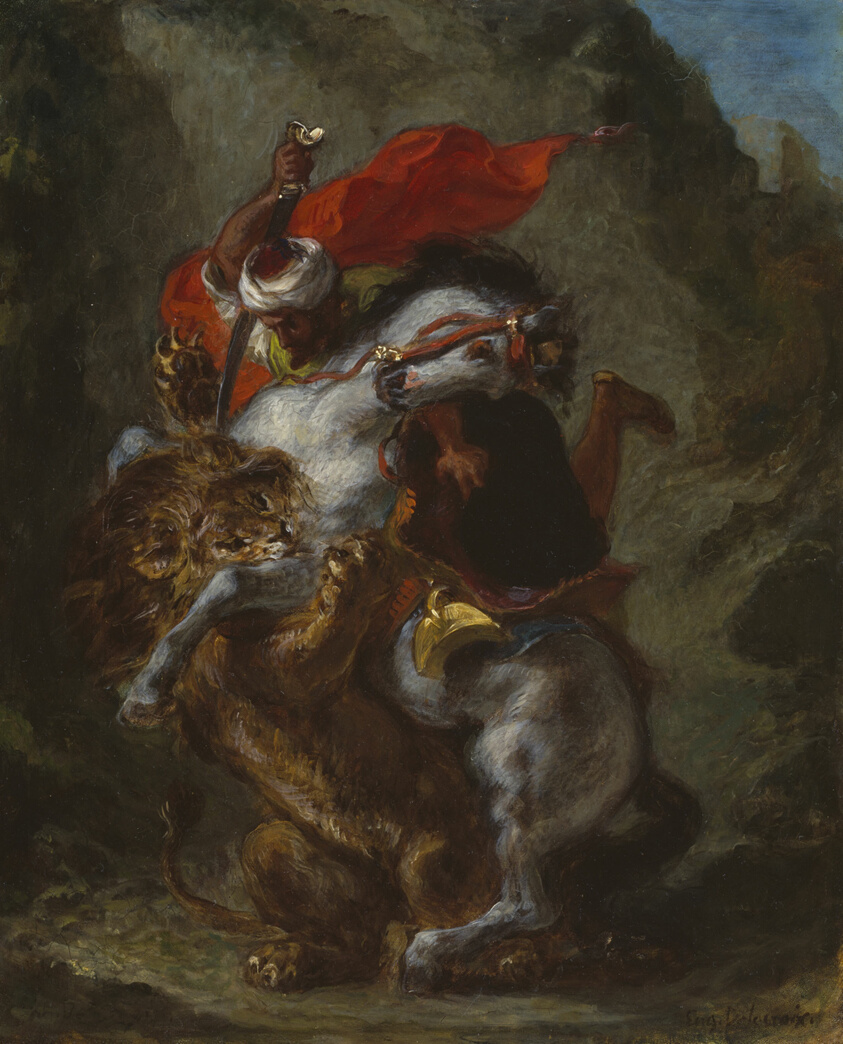

In [99]:
# using hte image package to get the image from the link
image = Image.open(BytesIO(r))
image
#image.save("Resources/image.jpg")

In [93]:

#https://www.artic.edu/iiif/2/26d3cea8-44c0-bfbd-a91a-19a007517152/full/843,/0/default.jpg
